# Chap2. 지도학습
4th. Introduction to Machine Learning with Python<br>
저자 : 안드레아스 뮐러 || 출판사 : 한빛미디어<br>

본 Notebook은 안드레아스 뮐로(출판사 한빛미디어)의 <code>파이썬 라이브러리를 활용한 머신러닝</code>을 공부하며 작성한 Notebook입니다.

이제 가장 인기있는 머신러닝 알고리즘들을 둘러보면서 데이터로부터 어떻게 학습하고 예측하는지 설명합니다.

밥먹고 오면 드디어! Data-Driven Approach를 하게됩니다!!

---
🚀::Start:: 20.05.17.sat pm4:00 

* 이번 장에서 다룰 내용들
    * 데이터로부터 어떻게 학습하고 예측하는가
    * 모델의 복잡도가 어떤 역할을 하는가
    * 각 알고리즘이 모델을 어떻게 만드는가
    * 모델들의 장단점 평가
    * Library 매개변수와 옵션
    * 분류와 회귀모델을 모두 가지고 있는 알고리즘에 대해서도 알아본다
    

## 2.3.1 예제에서 사용할 데이터셋

여러 알고리즘들을 설명하기 위해 데이터셋도 여러개 사용할 것입니다.

preamble.py파일을 Notebook과 같은 directory에 생성해줍니다

In [1]:
from preamble import *

C:\Users\stevelee\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\stevelee\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from preamble import *
import warnings
warnings.filterwarnings("ignore")

mglearn module이 없을 시 참고<br>
https://github.com/amueller/mglearn/issues/13

In [3]:
import matplotlib as mpl
print('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  C:\Users\stevelee\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


X.shape: (26, 2)


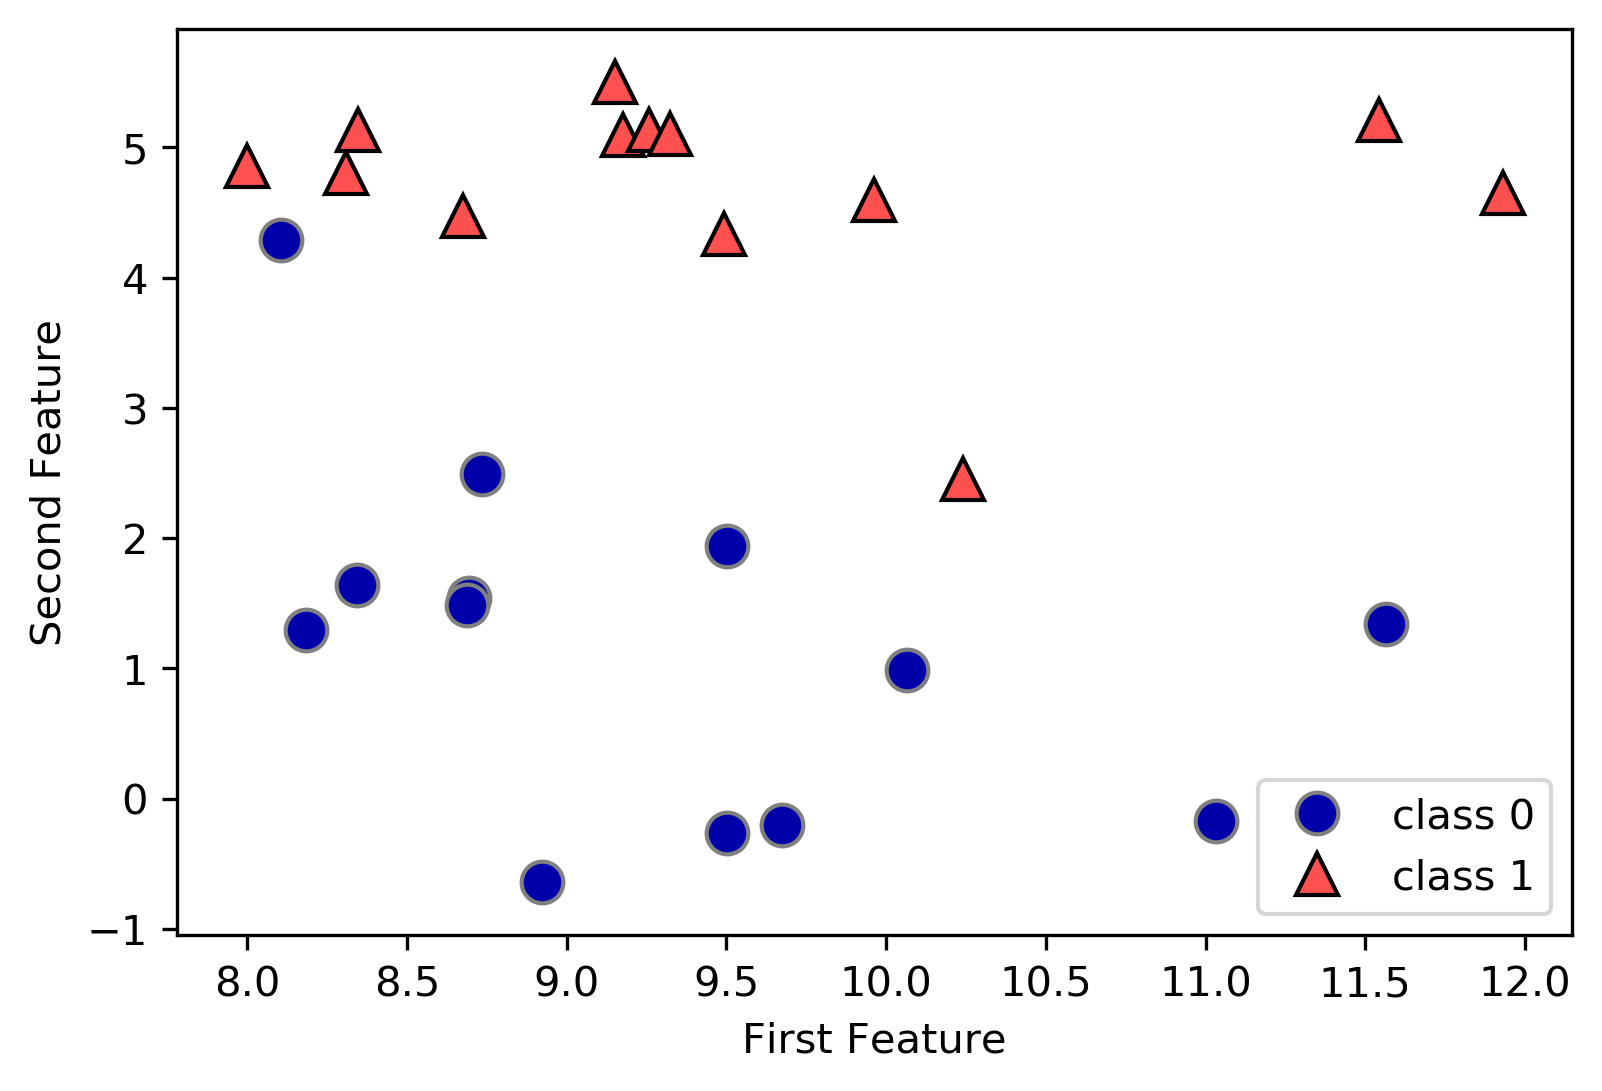

In [6]:
# 데이터셋을 만든다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

In [9]:
print(X.shape)

(26, 2)


X.shape 값에서 알 수 있듯이 이 데이터셋은 데이터 포인트 26개와 2개의 Feature를 갖습니다.

회귀 알고리즘 설명에서는 인위적으로 만든 wave 데이터셋을 사용합니다.

Text(0, 0.5, 'Traget')

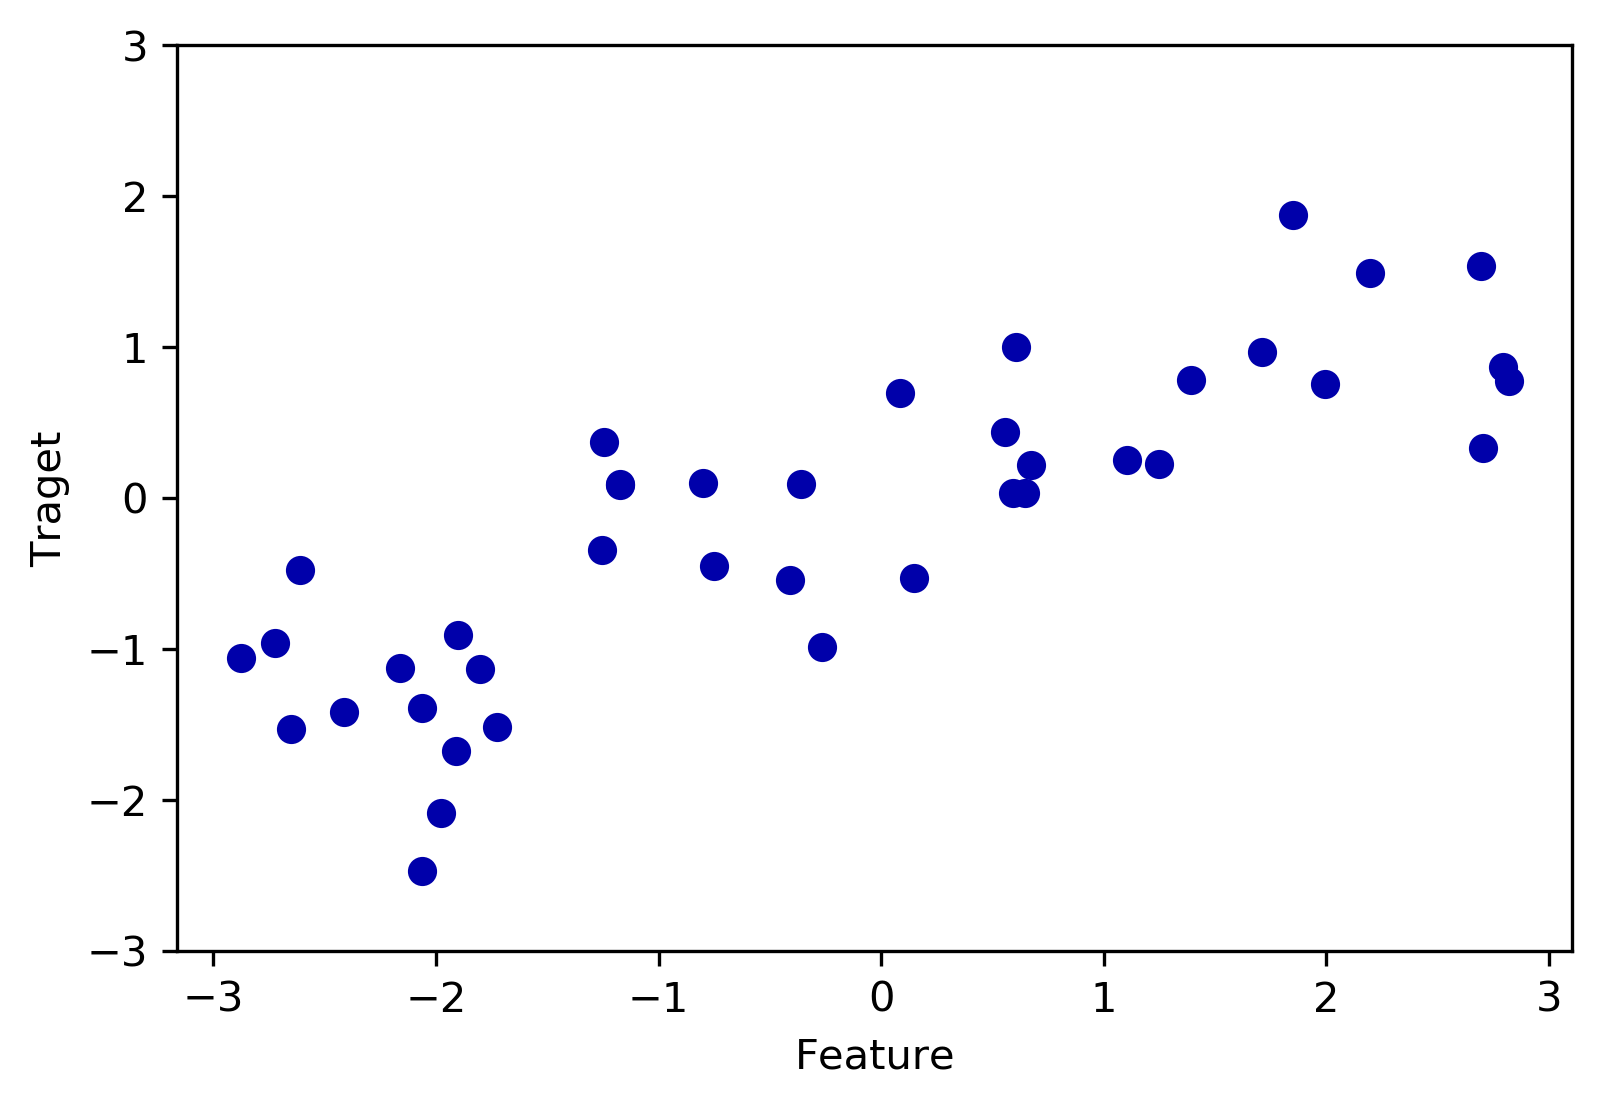

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Traget")

책에서는 지면의 특성상 3차원 이상의 차원을 표현하는데 있어 한계가 있기 떄문에 2차원 데이터를 사용했다고 합니다.<br>
물론 저차원 데이터셋에서 얻은 직관이 고차원 데이터셋에서 그대로 유지되지 않을 수 있다고 합니다. 하지만 이런 사실을 유념해 둔다면 알고리즘을 배울 때 저차원 데이터셋을 사용하는 것이 매우 좋다고 합니다. (적은 차원으로 알고리즘을 배우는 것이 보다 쉽게 받아들일 수 있어서 그렇지 않나 생각합니다.)

**인위적으로 생성한 소규모 데이터셋 외에 scikit-learn에 들어 있는 실제 데이터셋도 두 개를 사용합니다.**<br>

#### Cancer Dataset - for Binary Classification

* 1st. Wisconsin Breast Cancer Dataset(Cancer Dataset)
    * benign and malignant

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [17]:
cancer.data

array([[ 17.99 ,  10.38 , 122.8  , ...,   0.265,   0.46 ,   0.119],
       [ 20.57 ,  17.77 , 132.9  , ...,   0.186,   0.275,   0.089],
       [ 19.69 ,  21.25 , 130.   , ...,   0.243,   0.361,   0.088],
       ...,
       [ 16.6  ,  28.08 , 108.3  , ...,   0.142,   0.222,   0.078],
       [ 20.6  ,  29.33 , 140.1  , ...,   0.265,   0.409,   0.124],
       [  7.76 ,  24.54 ,  47.92 , ...,   0.   ,   0.287,   0.07 ]])

In [19]:
cancer.data.shape

(569, 30)

In [25]:
cancer.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [26]:
len(cancer.target)

569

In [27]:
print("클래스별 샘플 개수: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수: 
{'malignant': 212, 'benign': 357}


<code>feature_names</code> 속성을 확인하면 각 특성의 의미를 알 수 있습니다.

In [28]:
print("특성 이름: \n{}".format(cancer.feature_names))

특성 이름: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


* Feature_names:
    * mean radius: 평균 반경
    * mean texture: 텍스쳐 평균?
    * mean perimeter: 평균 둘레
    * mean area: 평균 면적
    * eman smoothness: 평활도
    * ...

#### Boston Housing - for Regression

데이터셋으로 할 작업은 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변 주택 평균 가격을 예측하는 것입니다. 이 데이터셋에는 데이터 포인트 506개와 특성 13개가 있습니다.

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터 형태: {}".format(boston.data.shape))

데이터 형태: (506, 13)


boston데이터셋으로는 13개의 feature뿐만 아니라 feature끼리 곱하여(또는 상호작용하여) 의도적으로 확장을 해보도록합니다(4장에서 다룹니다)

다시 말해 범죄율과 고속도로 접근성이라는 feature에 대해 개별 특성은 물론 범죄율x고속도로 접근성을 하나의 특성으로도 생각한다는 의미입니다.이처럼 특성을 유도해내는 것을 **Feature Engineering**이라고 합니다(4장에서 제대로 다뤄봅니다)

In [38]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


13개의 원래 feature에 13개에서 2개씩(중복을 포함해) 짝지은 91개의 특성을 더해 총 104개의 feature가 됩니다.

K-nn알고리즘부터 살펴보도록 합니다.

## 2.3.2 K-NN 알고리즘

<code>K-NN 알고리즘</code>은 가장 간단한 머신러닝 알고리즘입니다. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부입니다.

새로운 데이터 포인트에 대해 예측할 떄는 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾습니다.

### K-최근접 이웃 분류

<code>가장 간단한 K-NN알고리즘</code>은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용합니다.<br>
단순히 이 훈련 데이터 포인트의 출력이 예측됩니다.

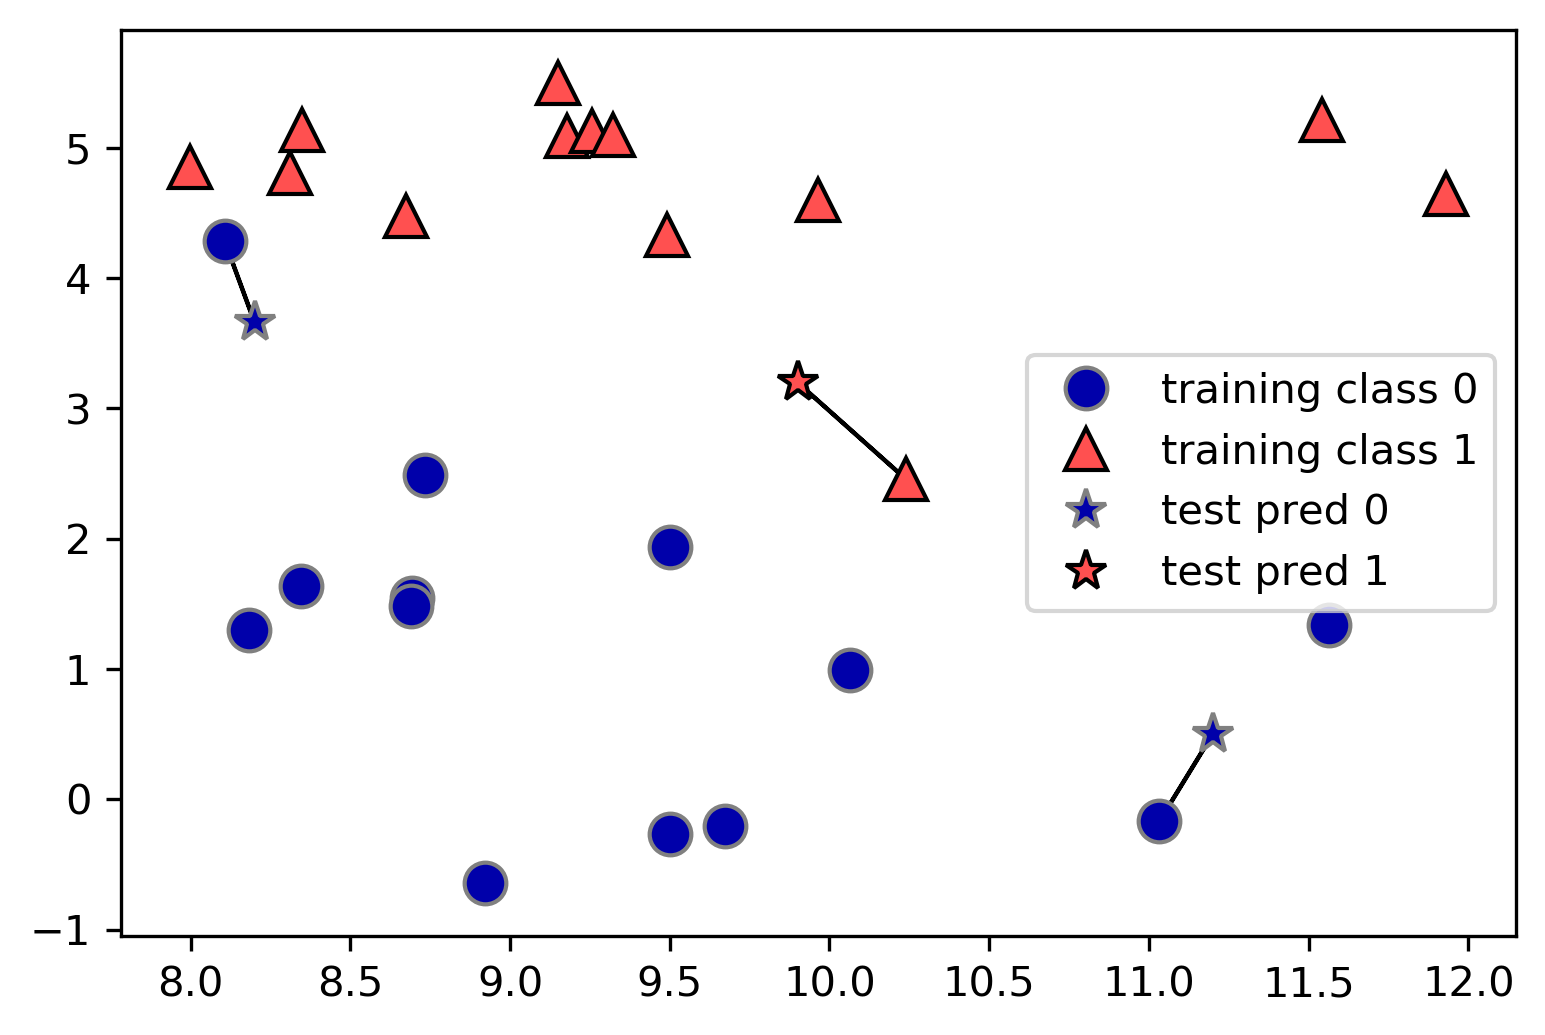

In [39]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

가까운 3개의 데이터 포인트로부터 예측하기

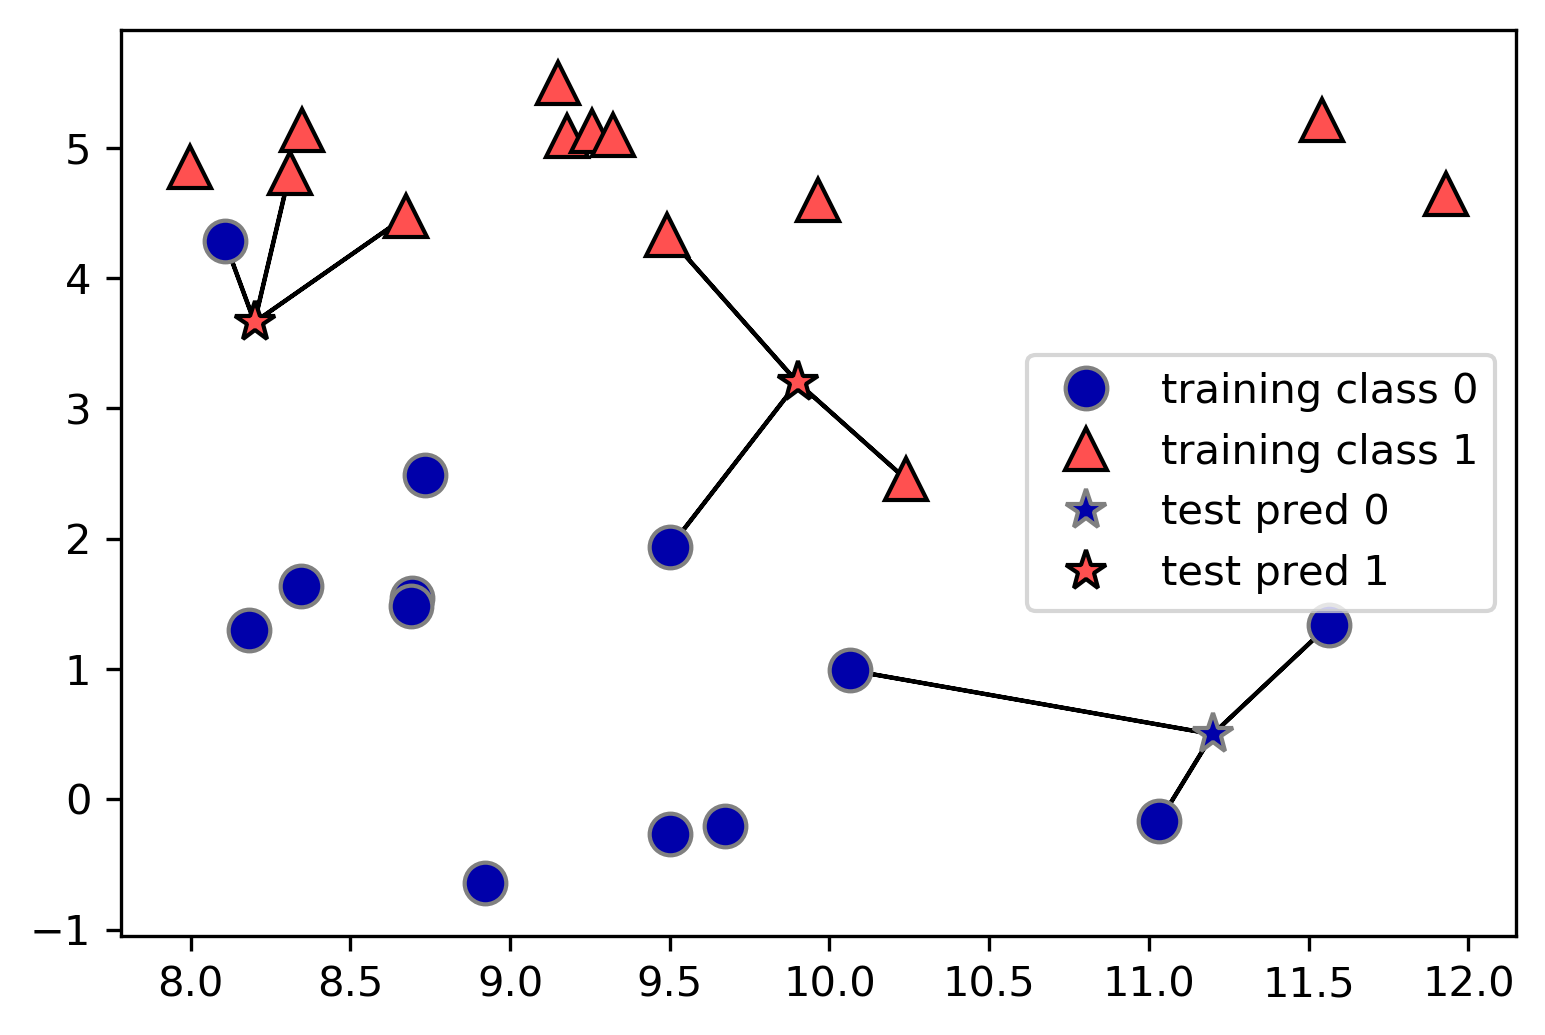

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

1개의 이웃(트레이닝 데이터 포인트)를 사용했을 때와 결과가 달라진 것을 확인할 수 있습니다.

이 그림은 이진 분류 문제이지만 클래스가 다수인 데이터셋에서도 같은 방법을 적용할 수 있습니다. 클래스가 여러개일 때도 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용합니다.

### K-NN Training

#1st. 앞서 2장의 2절에서 배웟던 것처럼 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눕니다.

In [46]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [48]:
print("train")
print(X_train.shape, y_train.shape)
print("test")
print(X_test.shape, y_test.shape)

train
(19, 2) (19,)
test
(7, 2) (7,)


#2nd. 다음은 k-NN Classifier를 import하고 객체를 만듭니다.<br>
이 때 이웃의 수와 같은 매개변수를 지정합니다.

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

#3rd. 이제 훈련 세트를 사용하여 분류 모델을 학습시킵니다.<br> KNN에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것입니다.

In [50]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#4th. 테스트 데이터에 대해 predict 메서드를 호출해서 예측합니다.

In [51]:
print("테스트 세트 예츨: {}".format(clf.predict(X_test)))

테스트 세트 예츨: [1 0 1 0 1 0 0]


모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출합니다.

In [52]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


이 모델의 정확도는 86%로 나왔습니다. 즉 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였습니다.

### KNeighborsClassifer 분석

2차원 데이터셋의 모든 테스트 포인트 예측을 x,y 평면에 그려봅니다. 그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠합니다.<br>
알고리즘이 클래스 0과 클래스 1로 지정한 결정 경계(decision boundary)를 볼 수 있습니다.

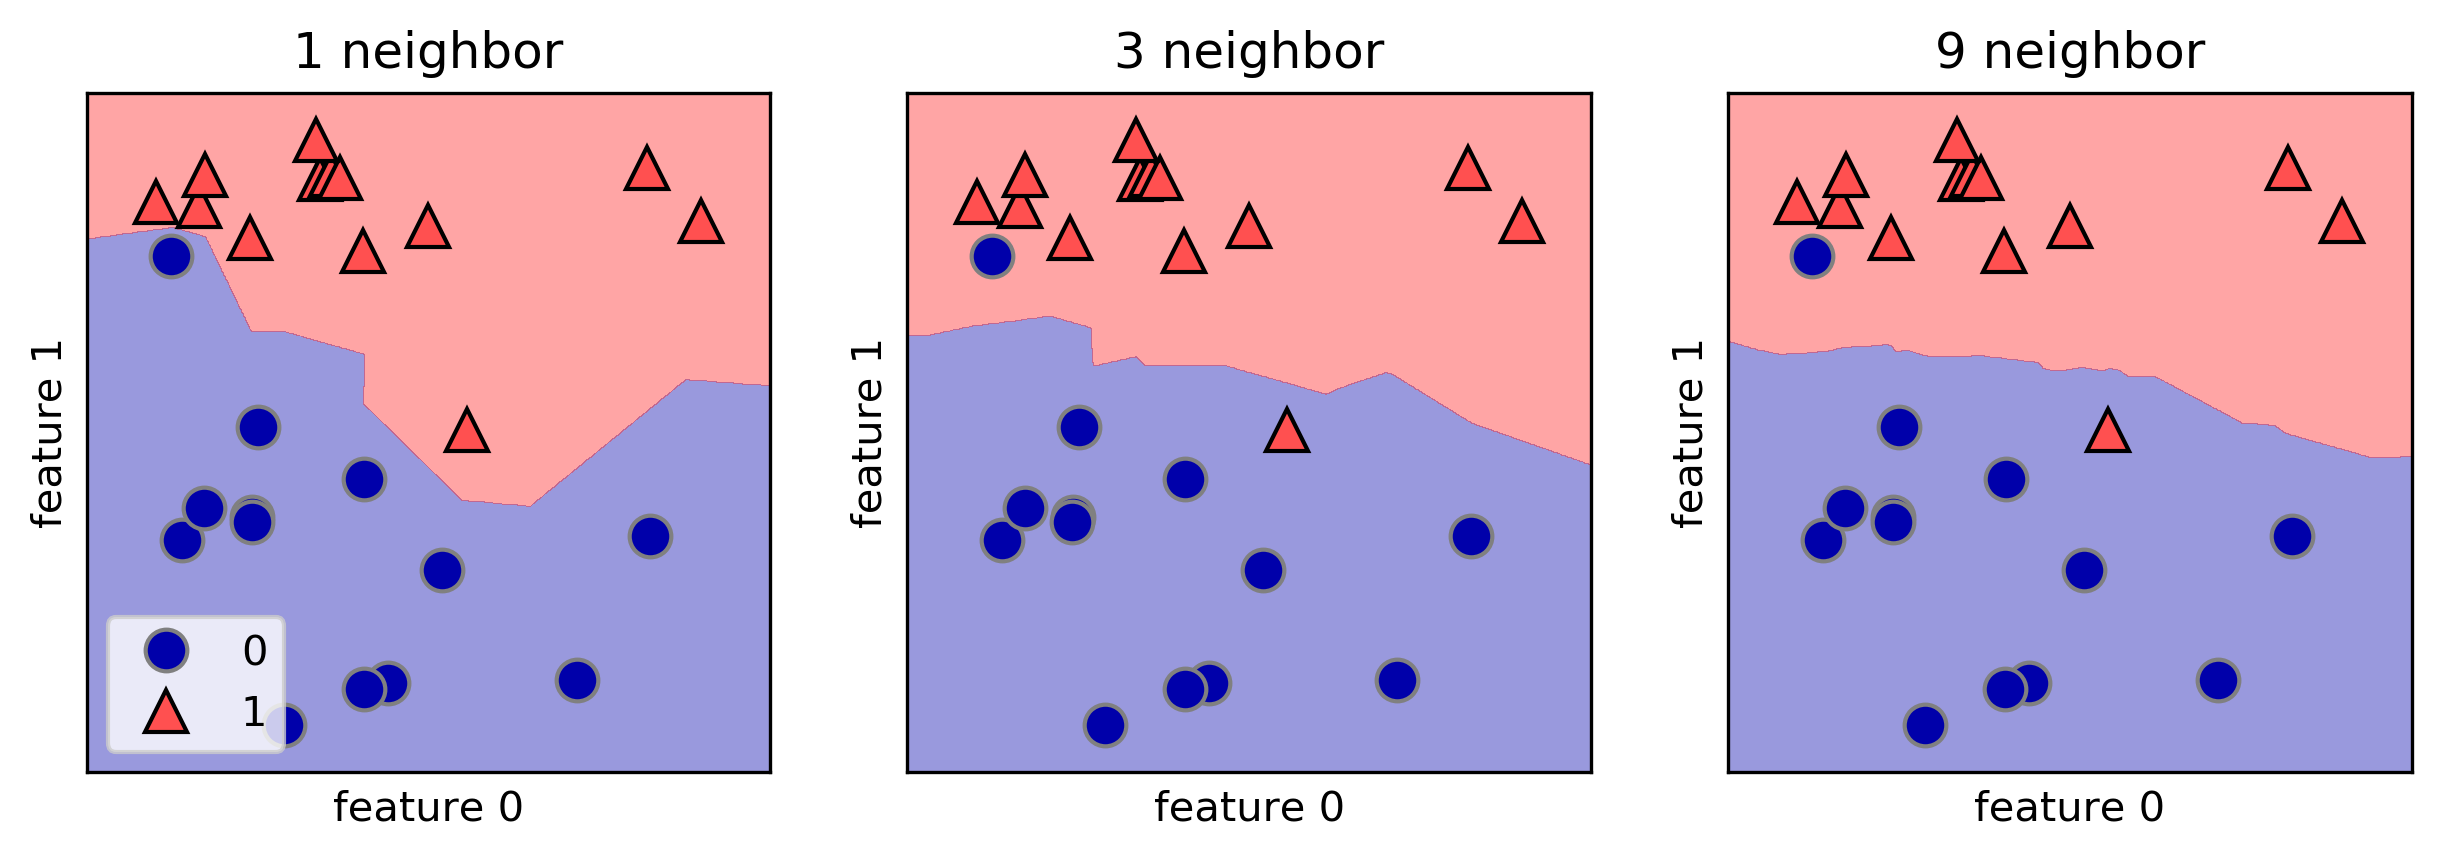

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환합니다.
    # 그래서 객체의 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax,
                                   alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

이웃을 하나 선택했을 때는 결정 경계(decision boundary)가 훈련 데이터에 가깝게 따라가고 있습니다. 이웃의 수를 늘릴 수록 결정 경계가 더 부드러워집니다. 부드러운 경계는 더 단순한 모델을 의미합니다.

---

앞서 이야기한 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴보도록 합니다. 유방암 데이터를 사용해 이웃의 수 parameter를 달리하며 모델을 학습합니다. 이 때 훈련세트와 테스트세트의 성능을 평가해 일반화의 정도를 확인해 봅니다.

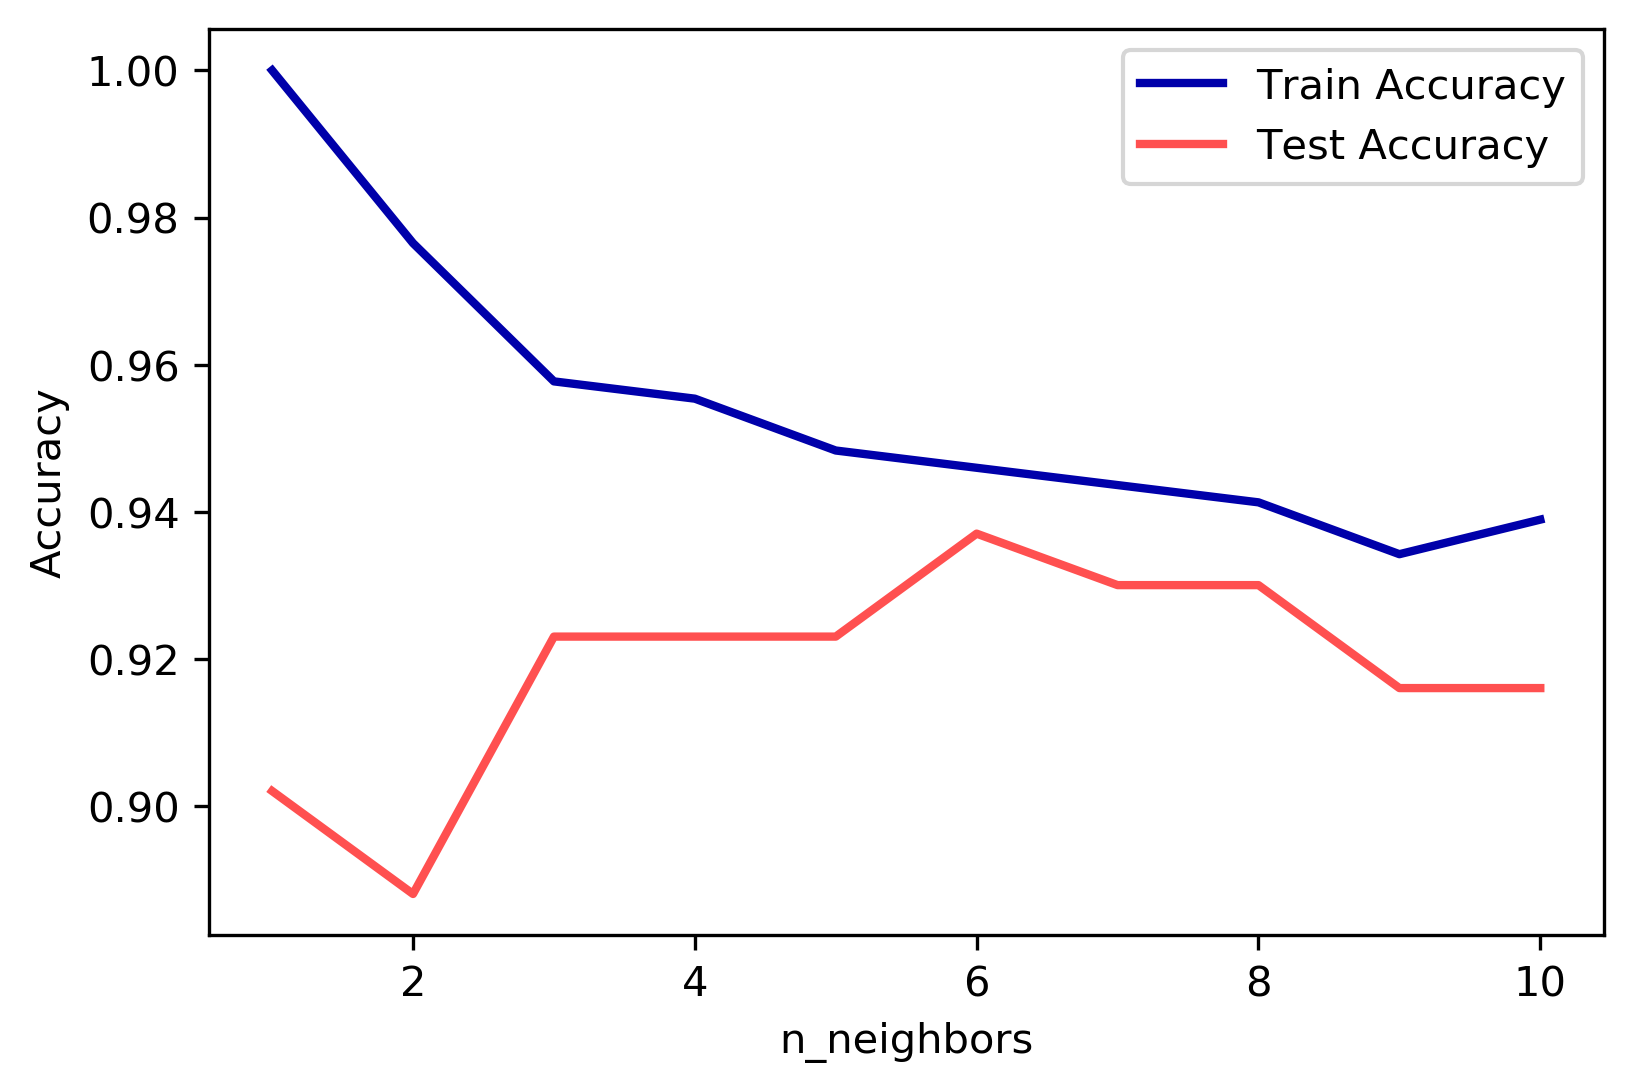

In [62]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
    # stratify: If not None, data is split in a stratified fashion, using this as the class labels
    
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, train_accuracy, label="Train Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

이웃의 수가 6일 때 test accuracy가 가장 높은 것을 확인할 수 있습니다.<br>

여기서도 과대적합(Overfitting)과 과소적합(Underfitting)의 특징을 볼 수 있습니다.<br>
* 모델의 일반화/과대적합/과소적합
    * 이웃의 수가 1일 경우 Train Accuracy는 100입니다.
    * 이웃의 수가 늘어날수록 모델은 단순해지고 train accuracy는 줄어듭니다.

### 📌 K-NN 이웃 회귀

📌 K-NN알고리즘은 회귀 분석에도 사용됩니다. 이번에는 wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃(K-NN)을 사용해보도록하겠습니다.

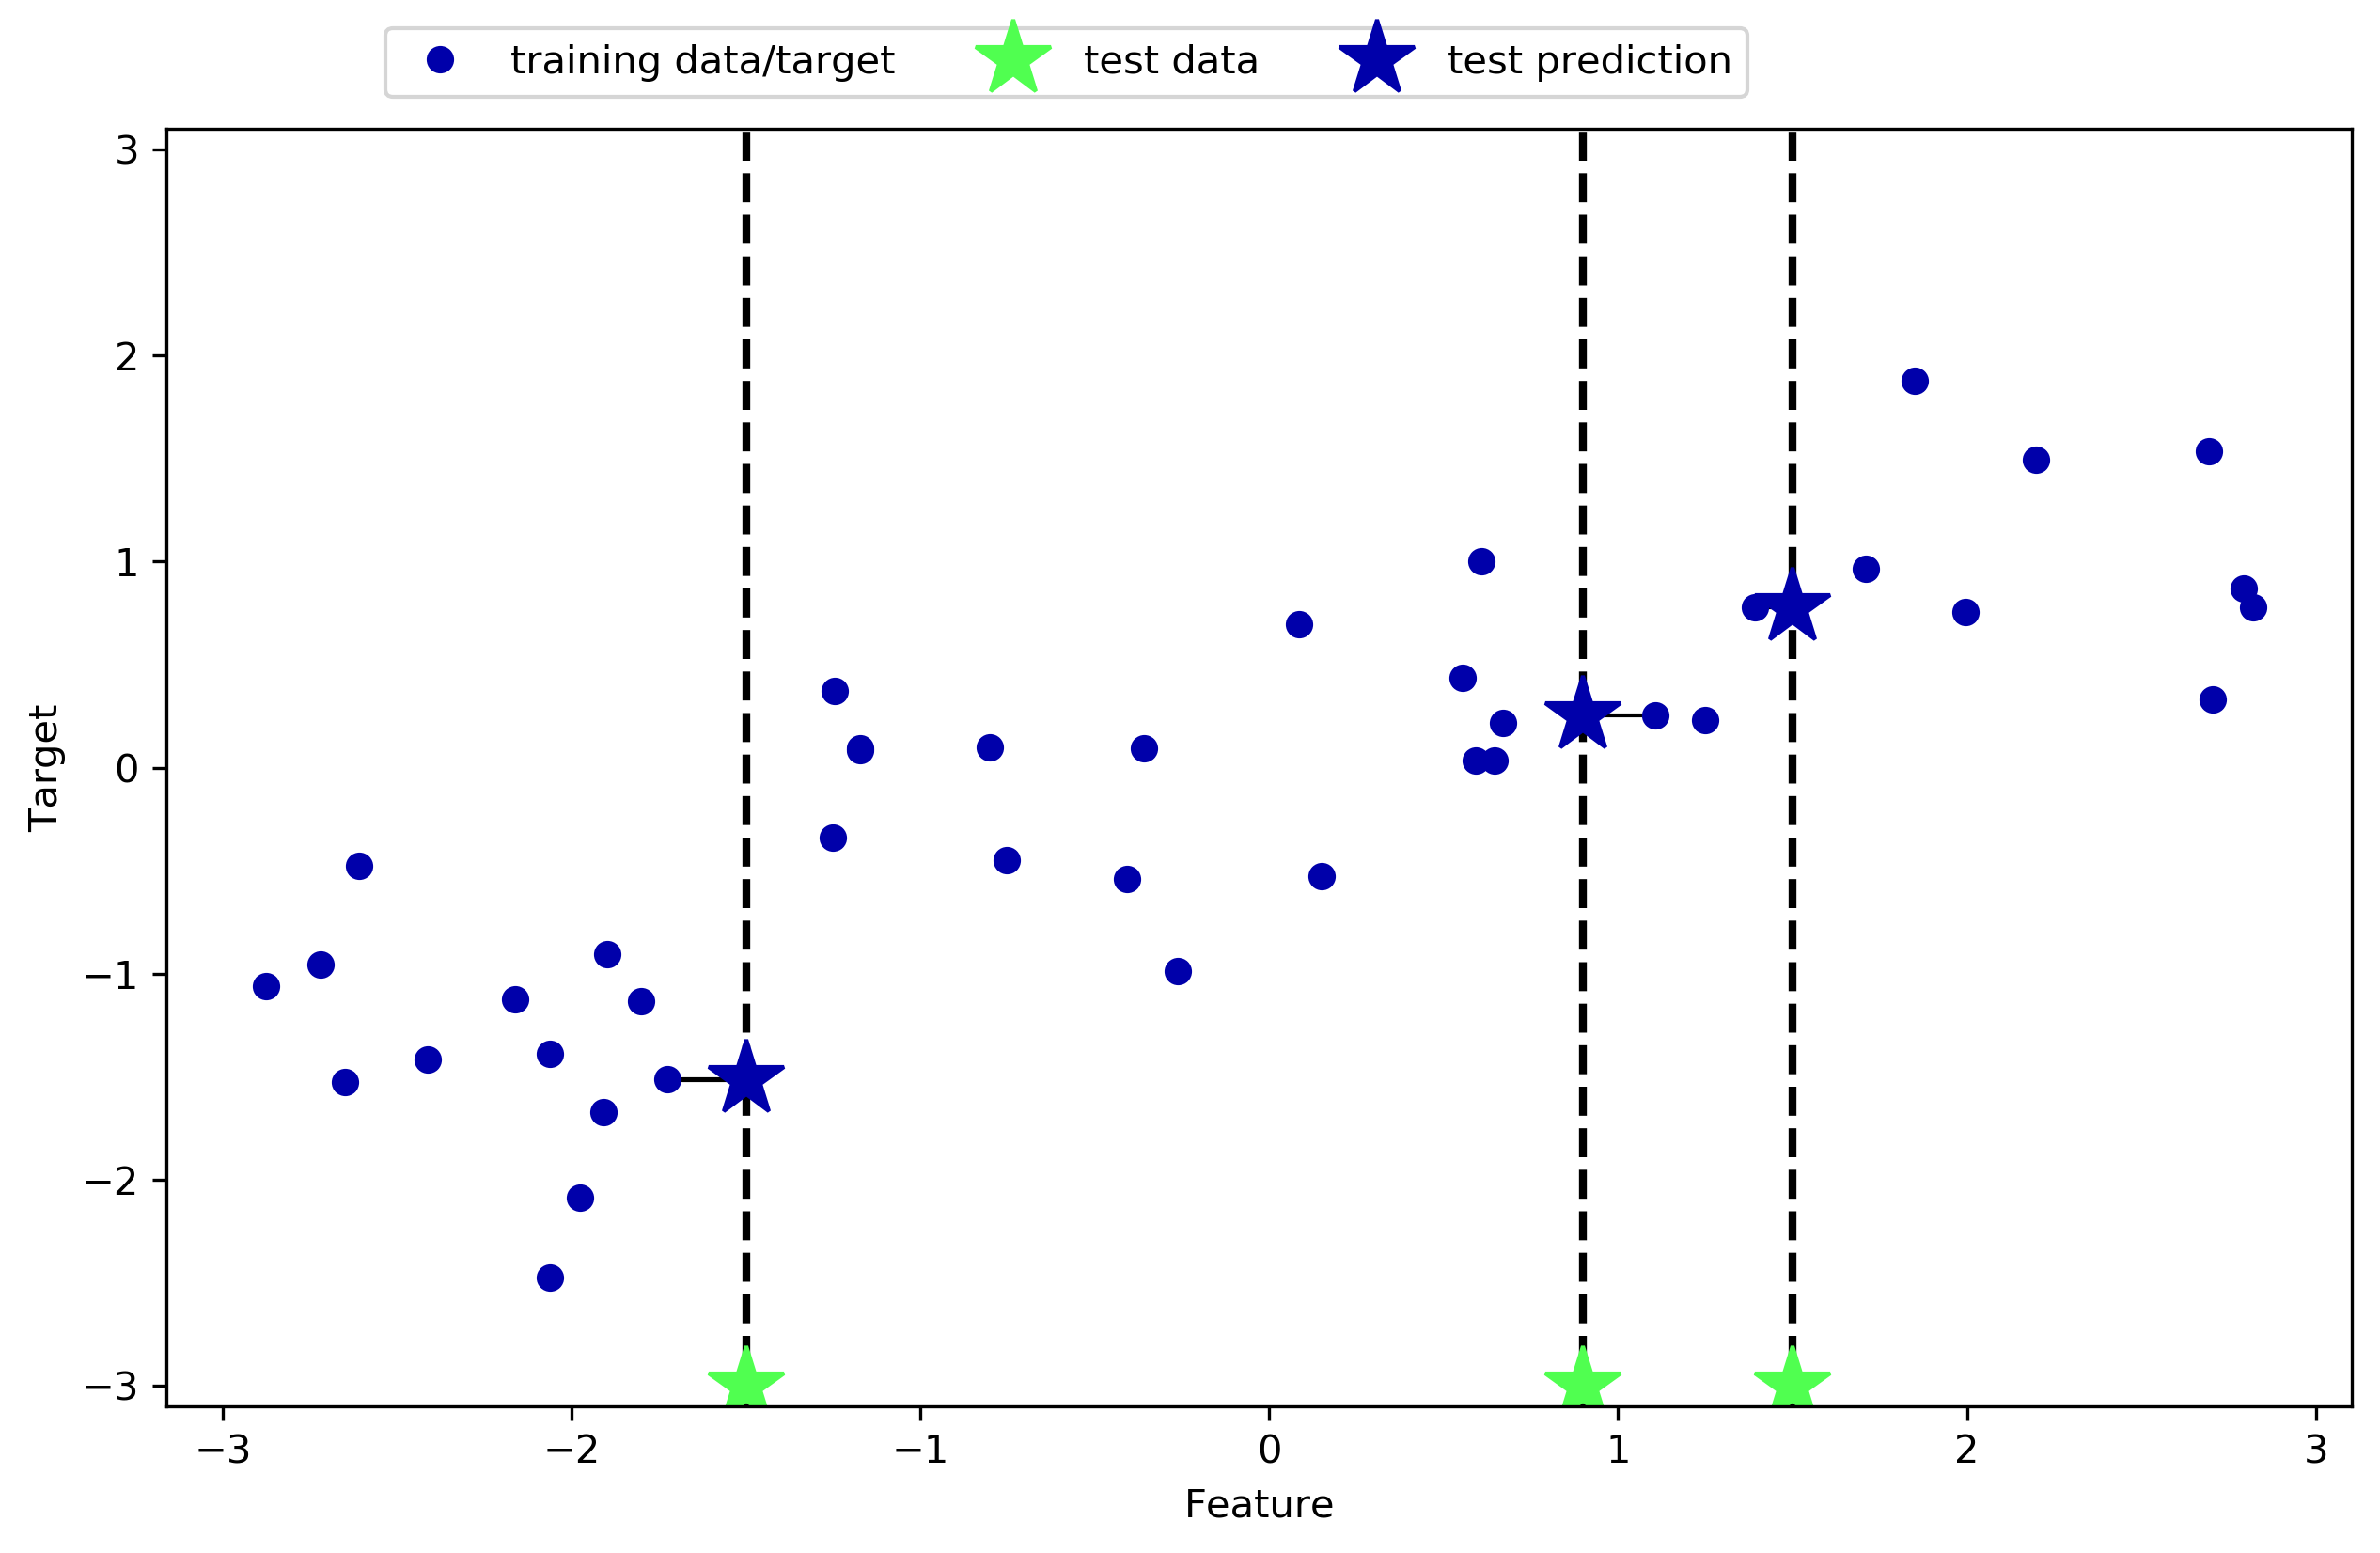

In [69]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

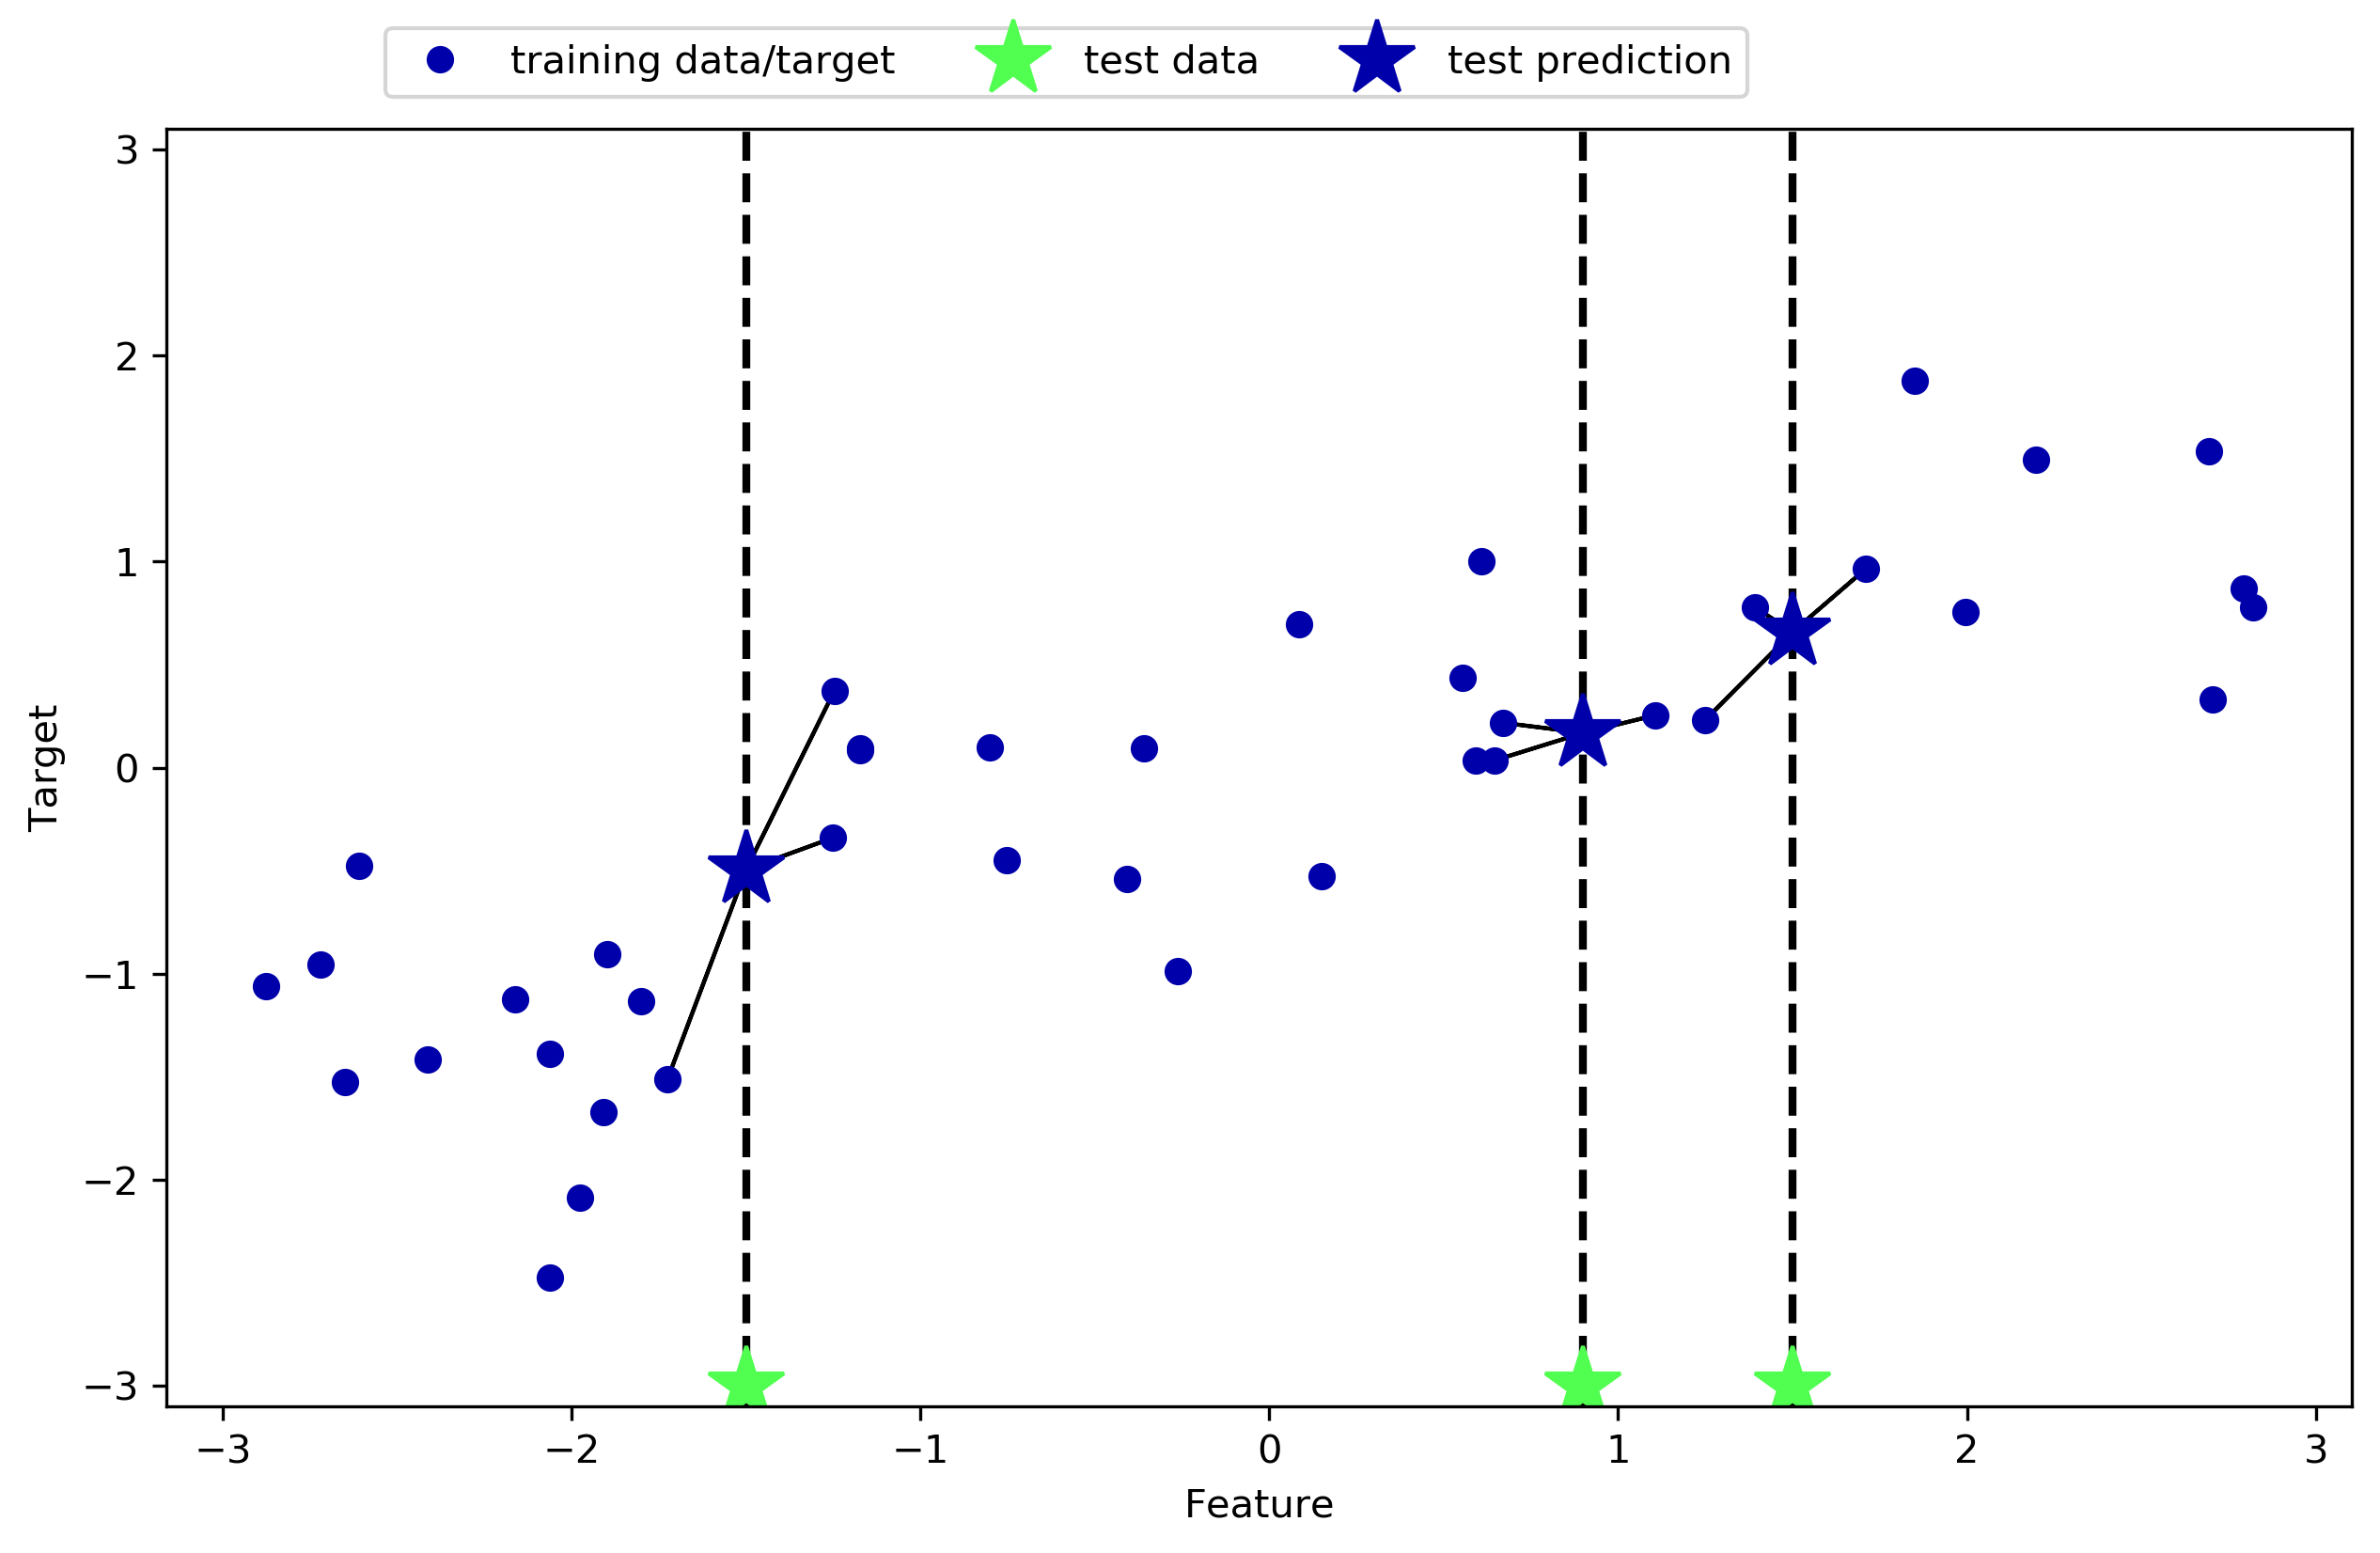

In [70]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서 회귀를 위한 k-nn알고리즘은 <code>KNeighborsRegressor</code>에 구현되어 있습니다. 

In [71]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련데이터와 target(class)를 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

테스트 세트에 대해 예측을 합니다.

In [72]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


역시 score 메서드를 사용해 모델을 평가할 수 있습니다.

In [73]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


회귀에서는 R^2값을 반환합니다. 결정 계수라고도 하는 R^2값은 회귀모델에서 예측의 적합도를 0과 1사이의 값으로 계산한 것입니다.

1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우입니다.

### KNeighborsRegressor 분석

앞서 생성한 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해 볼수 있습니다.

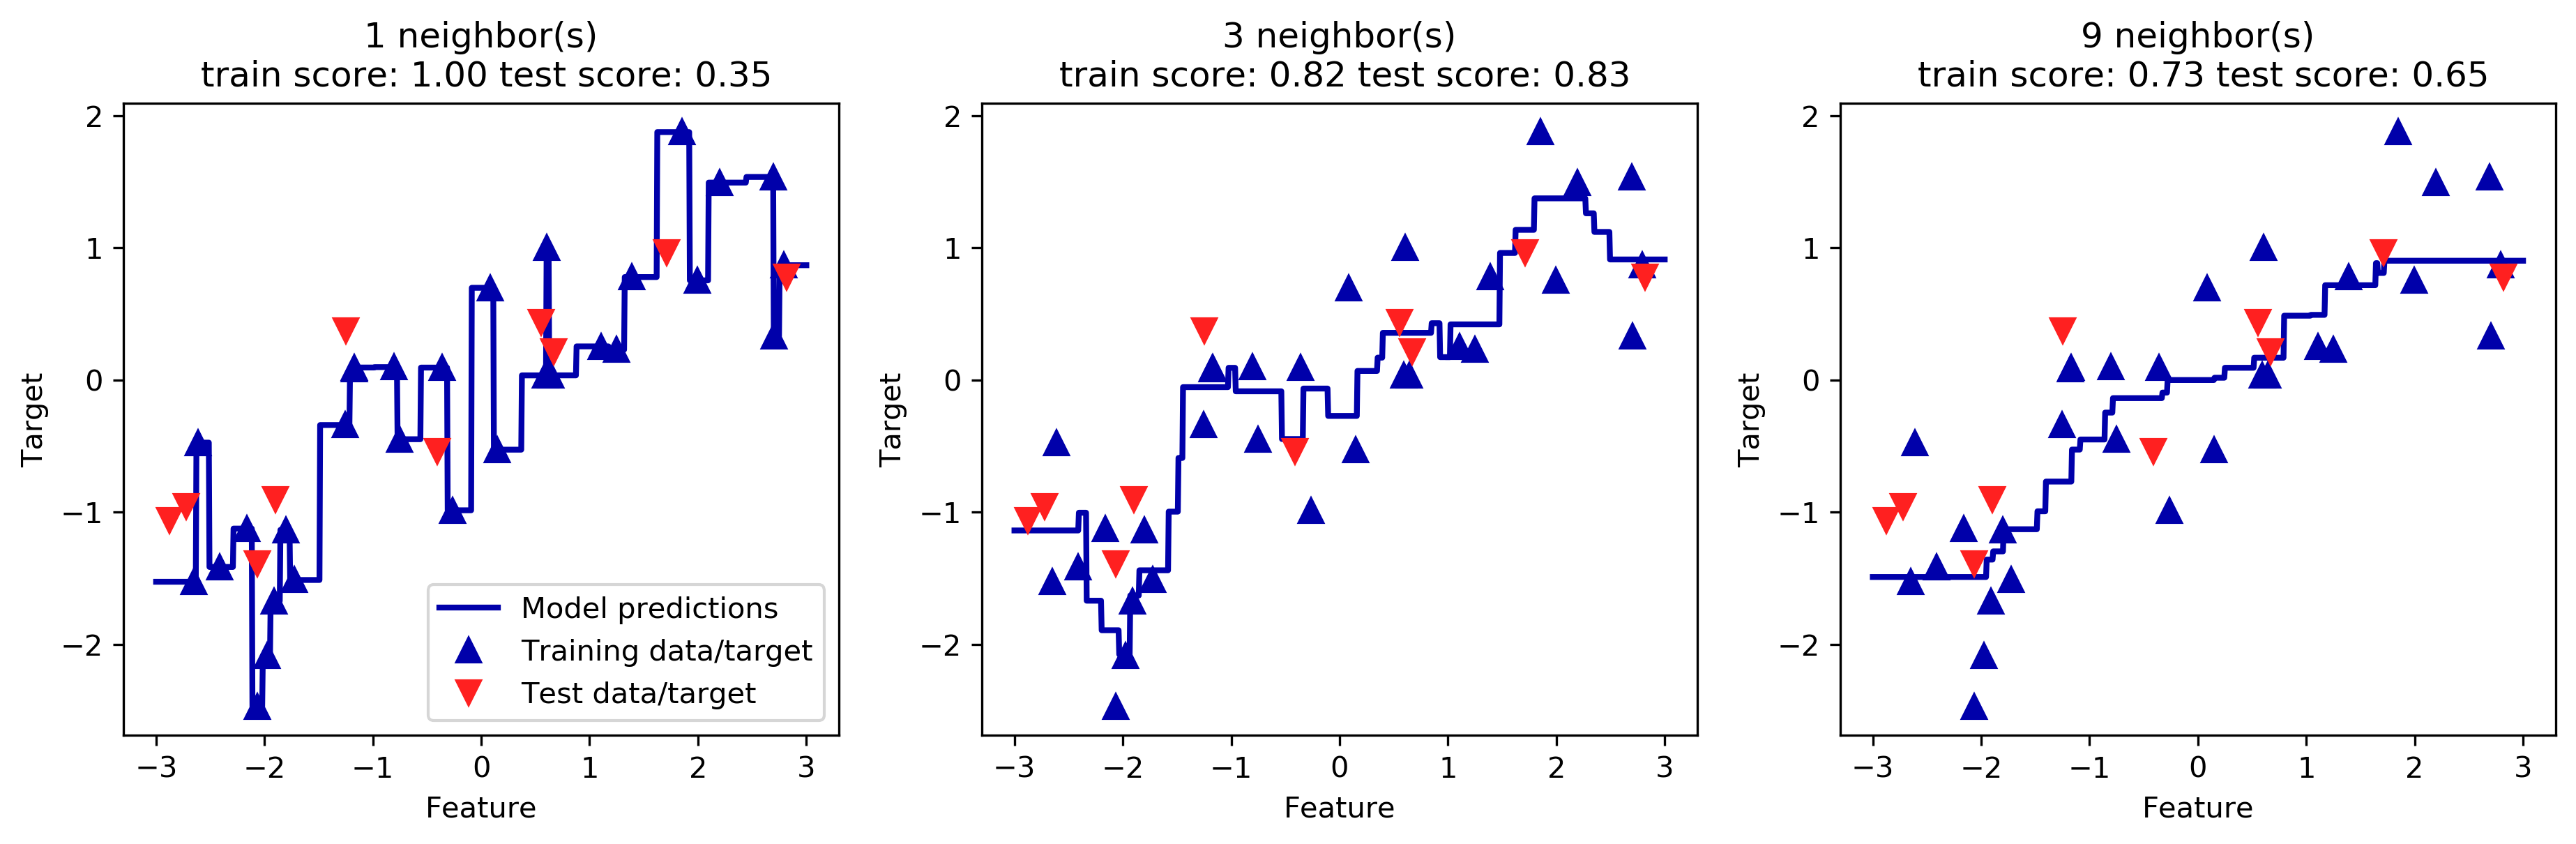

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

### 장단점과 매개변수

일반적으로 <code>KNeighbors Classifier</code>에 중요한 매개변수는 두 개입니다. 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수 입니다.

실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만 매개변수는 잘 조정을 해야 합니다.<br>
거리를 재는 방법을 고르는 문제는 이 책에서 다루지 않습니다만, 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용합니다.

K-NN의 장점은 이해하기 매우 쉬운 모델이라는 점입니다. 또한 많이 조정을 하지 않아도 좋은 성능을 발휘합니다.더 복잡한 알고리즘을 적용해보기 전에 시도해 볼수 있는 좋은 시작점입니다.

* KNN 알고리즘의 단점
    * 매우 쉽고 빠르게 만들 수 있지만 훈련 세트가 매우 크면 예측이 느려집니다.
    * K-NN알고리즘을 사용할 떈 데이터를 전처리하는 과정이 중요합니다.
    * 수백 개 이상의 많은 특성을 가진 데이터셋에서는 잘 동작하지 않습니다.
    * 또한 특성 값 대부분이 0인 (즉 희소한)데이터셋과는 특히 잘 작동하지 않습니다.

K-NN 알고리즘이 이해하기는 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰이지 않습니다. 이런 단점이 없는 알고리즘은 다음에 설명할 선형 모델입니다.